![Teste](https://cdn.pixabay.com/photo/2016/02/11/23/03/sao-paulo-1194935_960_720.jpg)

Imagem de <a href="https://pixabay.com/pt/users/joelfotos-767874/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Joel santana Joelfotos</a> por <a href="https://pixabay.com/pt/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=1194935">Pixabay</a>

Sumário

[Alura](https://www.alura.com.br/)

# 01. Introdução

## 01.01. A inspiração do projeto

Falar da imersão dados 04 da Alura

## 01.02. O Problema a ser abordado 

# 02. Análise Exploratória dos Dados

## 02.01. Bibliotecas utilizadas

### Principais bibliotecas utilizadas

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Instalação e importação de bibliotecas menos usuais

In [46]:
!pip install shapely
!pip install geopandas

from shapely.geometry import Point
import geopandas as gpd

Configurando algumas opções das bibliotecas importadas

In [47]:
# 2 casas decimais de precisão
pd.set_option("display.precision", 2)

# formatação expandida com 2 casas decimais de precisão
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# configuração do seaborn
sns.set()

## 02.02. Leitura dos dados 

In [48]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

# Leitura do arquivo csv
df_raw = pd.read_csv(url)

In [49]:
# Visualização do cabeçalho do DataFrame
df_raw.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


## 02.03 Exploração, Tratamento e Limpeza de dados

### Tratamento de dados nulos e de tipagem de dados

Uma primeira investigação que pode ser feita é sobre o tipo dos dados e a quantidade de dados não nulos por coluna do DataFrame. O método `info()` nos fornece isto

In [50]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Nota-se que as colunas Rua e Bairro apresentam dados nulos. Além disto, a coluna 'Valor' apresenta o tipo objeto. O esperado seria que o tipo fosse de espécie numérica. Isto indica que provavelmente será necessário aplicar algum tipo de tratamento nesta coluna 'Valor' para transformá-la em um tipo numérico.

Ao buscar um elemento da coluna 'Valor' vemos que ele aparenta ser uma string.

In [51]:
df_raw["Valor"][0]

'R$ 7.000.000'

Podemos confirmar sua tipagem utilizando o comando `type`

In [52]:
type(df_raw["Valor"][0])

str

E como esperado, a variável é do tipo string. 

Podemos utilizar o método `split` para separar o R$ do 'número' e o argumento `expand=True` para criar um data frame das com as divisões realizadas pelo método `split`.

In [53]:
df_raw["Valor"].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Deve-se investigar cada uma das colunas geradas.

In [54]:
df_raw["Valor"].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [55]:
df_raw["Valor"].str.split(expand=True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [56]:
df_raw["Valor"].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

- A primeira coluna apresenta somente o símbolo da moeda;
- A segunda coluna parece conter apenas as strings de 'números' que devem ser convertidas;
- Aparentemente, os dados da terceira coluna que apresentam as qualidades '/Mês', '/Ano' e '/Dia' estão relacionados com imóveis disponíveis para serem alugados. Por hora estes imóveis não nos interessam e podem ser removidos da base de dados.

Neste momento é conveniente criar um DataFrame que contemple a coluna valor expandida.

In [57]:
# Faz uma cópia do DataFrame original
df_expandido = df_raw

# Cria três novas colunas que armazenam o split da coluna Valor
df_expandido[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df_expandido["Valor"].str.split(expand=True)
df_expandido.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [58]:
# Filtra o DataFrame, removendo os dados de aluguéis (dados que tem tipo anúncio = '/Mês', '/Ano' e '/Dia')
dados_vendas = df_expandido[df_expandido["Tipo_anuncio"].isnull()]
dados_vendas.head(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None


In [59]:
# Sobrescrevendo a coluna Valor com os valores tratados e transformados para float 
# Remoção dos caracteres de pontos dos dados da coluna Valor_anuncio e conversão do tipo para float 
dados_vendas["Valor"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

<ipython-input-59-7f3057e46d3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["Valor"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)


Novamente, pode-se utilizar o método `info()` para extrair informações do Dataset atual.

In [60]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6107 non-null   object 
 1   Bairro         9146 non-null   object 
 2   Cidade         9156 non-null   object 
 3   Metragem       9156 non-null   int64  
 4   Quartos        9156 non-null   int64  
 5   Banheiros      9156 non-null   int64  
 6   Vagas          9156 non-null   int64  
 7   Valor          9156 non-null   float64
 8   Moeda          9156 non-null   object 
 9   Valor_anuncio  9156 non-null   object 
 10  Tipo_anuncio   0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.4+ KB


Note que a coluna Tipo_anuncio só contém valores vazios. Neste momento é conveniente a remoção desta coluna e também das colunas associadas à Valor que ainda são do tipo string. 

In [61]:
# Removendo colunas que já foram tratadas
dados_vendas.drop(columns=['Moeda', 'Valor_anuncio', 'Tipo_anuncio'], inplace=True)

dados_vendas.head(2)

/home/yorinori/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00


Está completa a conversão do tipo da coluna Valor para tipo float.

## Visualização dos Dados numéricos 

In [62]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


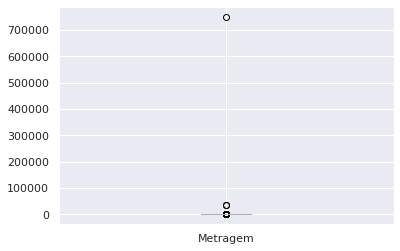

In [63]:
dados_vendas[['Metragem']].boxplot()

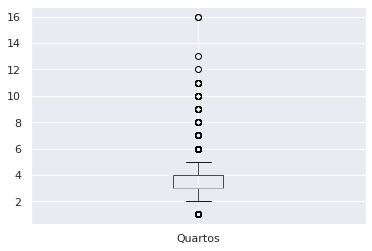

In [64]:
dados_vendas[['Quartos']].boxplot()

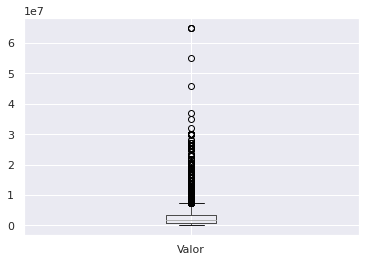

In [65]:
dados_vendas[['Valor']].boxplot()

Ao observar o Boxplot de algumas variáveis, fica claro que existem outliers que devem ser removidos. Os outliers são dados que se diferenciam drasticamente de todos os outros no conjunto de dados e que podem comprometer a análise e, portanto devem ser removidos.

## Remoção de Outliers: Método "Interquartile Range (IQR)" 

In [71]:
# Seleção das colunas alvo
cols = ["Valor"] 

# Cálculo dos percentis e IQR
Q1 = dados_vendas[cols].quantile(0.25)
Q3 = dados_vendas[cols].quantile(0.75)
IQR = Q3 - Q1

# Remoção dos Outliers através do método IQR
dados_vendas_IQR = dados_vendas[~((dados_vendas[cols] < (Q1 - 1.5 * IQR)) |(dados_vendas[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

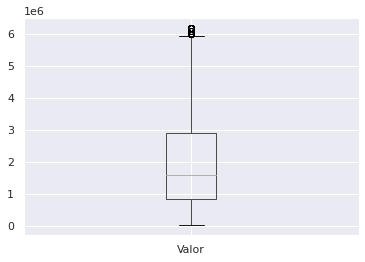

In [72]:
# Boxplot após remoção dos Outliers
dados_vendas_IQR[['Valor']].boxplot()

In [73]:
# Sobrescrevendo o df dados_vendas com o df tratado com remoção de outliers
dados_vendas = dados_vendas_IQR

## Outras formas de visualizações dos dados

## 02.03. Relacionando Base de Dados

### Base de dados do IBGE (Renda)

### Base de dados de endereços

### Base de dados para o geopandas (dimensões do polígono)

## -Dataset "final"

# 03. Objetivo do Projeto

# 04. Machine Learning: problema de regressão

## Objetivo

## Construção do Baseline

## Redução de Dimensionalidade

## Seleção de modelo

# 05. Conclusões

# 06. Referência Bibliográficas

# 07. Agradecimentos

# 08. Sobre mim